# Deteção de armas e facas

In [11]:
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
from keras.models import load_model
from keras.preprocessing.image import  img_to_array

In [2]:
m, n = 240, 240
batch_size = 32
nb_classes = 2
nb_epoch = 60
nb_filters = 128
nb_pool = 2
nb_conv = 3

In [3]:
model = load_model('model/model_latest.h5')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 3, 240, 128)       276608    
_________________________________________________________________
activation_1 (Activation)    (None, 3, 240, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 240, 64)        73792     
_________________________________________________________________
activation_2 (Activation)    (None, 3, 240, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 3, 240, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 240, 32)        18464     
_________________________________________________________________
activation_3 (Activation)    (None, 3, 240, 32)        0         
__________

In [12]:
def predict(image_name):
    im = Image.open(image_name)
    imrs = im.resize((m, n))
    imrs = img_to_array(imrs) / 255
    imrs = imrs.transpose(2, 0, 1)
    imrs = imrs.reshape(3, m, n)

    x = []
    x.append(imrs)
    x = np.array(x)
    predictions = model.predict(x)

    plt.imshow(im)
    plt.show()

    print('faca' if predictions[0][0] > predictions[0][1] else 'Arma')


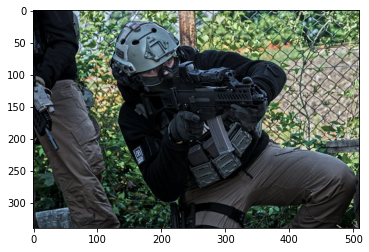

Arma


In [13]:
predict('test.jpg')

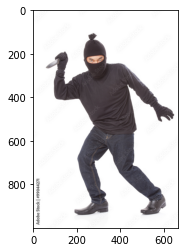

faca


In [14]:
predict('test2.jpg')